In [76]:
import numpy as np
import pandas as pd
import datetime
from urllib import request
import json
 
def get_sina_kline(symbol='m2201', period='d', market='期货',**kwargs) -> 'DataFrame':
    '''
    用途：获取sina股票期货指定周期的人历史1023个数据
    返回：DataFrame  columns name [date,open,high,low,close,volume]
    参数:
    symbol品种代码,
    period是周期(5m,15m,30m,60m日线),datalen是获取数据的长度，最大就是1023
    mode=['股票','期货','股指期货']
    kwargs:仅用于A股
    stock_zh_a_daily(symbol: str = 'sh603843', start_date: str = '19900101', end_date: str = '21000118', adjust: str = '') ->‘DataFrame’
    start_date: str = '19900101',
    end_date: str = '21000118',
    adjust: str = '' 默认为空: 返回不复权的数据;
        qfq: 返回前复权后的数据; hfq: 返回后复权后的数据; hfq-factor: 返回后复权因子; hfq-factor: 返回前复
    实例：
    get_sina_kline(symbol='sh000001', period='60m', market='股票')
    get_sina_kline(symbol='sh000001', period='d', market='股票')
    get_sina_kline(symbol='rb1910', period='60m', market='期货')
    get_sina_kline(symbol='rb1910', period='d', market='期货')
    get_sina_kline(symbol='IF1908', period='60m', market='股指期货')
    get_sina_kline(symbol='IF1908', period='d', market='股指期货')
    说明：
    股票历史数据API:
    5分钟：https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=sh000001&scale=5&datalen=1023
    15分钟：https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=sh000001&scale=15&datalen=1023
    30分钟：https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=sh000001&scale=30&datalen=1023
    60分钟：https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=sh000001&scale=60&datalen=1023
    商品期货历史数据API:
    5分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine5m?symbol=rb1910
    15分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine15m?symbol=rb1910
    30分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine30m?symbol=rb1910
    60分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine60m?symbol=rb1910
    日K线：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesDailyKLine?symbol=rb1910
    股指期货历史数据API:
    5分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine5m?symbol=IF1908
    15分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine15m?symbol=IF1908
    30分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine30m?symbol=IF1908
    60分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine60m?symbol=IF1908
    日线：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesDailyKLine?symbol=IF1908
    '''
    cols = ['date', 'open', 'high', 'low', 'close', 'volume']
    if market == '股票':
        if period in ['5m', '15m', '30m', '60m']:
            url = 'https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=%s&scale=%s&datalen=1023' % (
                symbol, period[:-1])
        else:
            data=lambda key,default:kwargs[key] if key in kwargs else default
            start_date=data('start_date', '19900101')
            end_date = data('end_date', '20000101')
            adjust = data('adjust', '')
            df= ak.stock_zh_a_daily(symbol, start_date, end_date, adjust)
            return df[cols]
 
    elif market=='期货':
        if period in ['5m', '15m', '30m', '60m']:
            url = 'http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine%s?symbol=%s' % (
                period, symbol)
        else:
            url = 'http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesDailyKLine?symbol=%s' % (
                symbol)
    else:
        if period in ['5m', '15m', '30m', '60m']:
            url = 'http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine%s?symbol=%s' % (
                period, symbol)
        else:
            url = 'http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesDailyKLine?symbol=%s' % (
                symbol)
 
    req = request.Request(url)
    rsp = request.urlopen(req)
    res = rsp.read()
    res_json = json.loads(res)
    df= pd.DataFrame(res_json)
    if market == '股票':
        df.rename(columns={'day':'date'}, inplace=True)
        df =df[cols]
    else:
        df.rename(columns=dict(zip(df.columns,cols)), inplace=True)
    return df
 
 
# global_gdp_radio_quarterly()
data = get_sina_kline(symbol='IF1908', period='d', market='股指期货')
data.head()

,date,open,high,low,close,volume
0,2019-06-24,3812,3818.6,3781.6,3807.8,379
1,2019-06-25,3800.8,3806,3720.2,3763,472
2,2019-06-26,3746.2,3778.4,3743.2,3759.4,274
3,2019-06-27,3775.4,3832,3774,3806.2,884
4,2019-06-28,3803,3811.6,3778,3810.8,688


In [77]:
import sys
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

#使用AIC、BIC参数模型自动定阶
import statsmodels.api as sm
#这是进行adf平稳性检验的库
from statsmodels.tsa.stattools import adfuller  as adf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#纯随机检验，LB和Q统计量
from statsmodels.stats.diagnostic import acorr_ljungbox 
#进行模型拟合
from statsmodels.tsa.arima.model import ARIMA

"""中文显示问题"""
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [78]:
data["close"] = data["close"].astype(np.float)

In [83]:
data = data[['date','close']]
data.head()
data = data.set_index('date')

In [84]:
data

,close
date,
2019-06-24,3807.8
2019-06-25,3763.0
2019-06-26,3759.4
2019-06-27,3806.2
2019-06-28,3810.8
2019-07-01,3903.2
2019-07-02,3905.6
2019-07-03,3873.0
2019-07-04,3851.2


In [85]:
data.index = pd.to_datetime(data.index, format = '%Y-%m-%d')

In [87]:
"""单位根检验，adf平稳性检验"""
print("单位根检验:\n，返回的结果中共有7个值，分别是adf、pvalue、usedlag、nobs\
          、critical values、icbest和resstore，这7个值的意义大家可以参考官方文档，")
print(adf(data['close']))   

单位根检验:
，返回的结果中共有7个值，分别是adf、pvalue、usedlag、nobs          、critical values、icbest和resstore，这7个值的意义大家可以参考官方文档，
(-1.6589994748914039, 0.4523512629665959, 2, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, 273.9267284073688)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


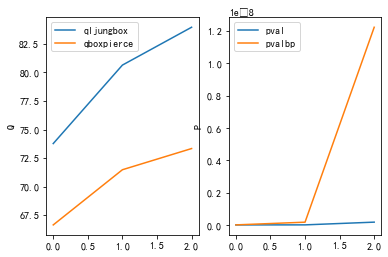

序列数据：qljungbox, pval, qboxpierce, pvalbp: [73.77035201 80.64981103 83.96717528] [6.87357536e-14 3.10212276e-12 1.71744205e-10] [66.63914223 71.47646236 73.33331112] [1.99487828e-12 1.69388532e-10 1.22331096e-08]


In [88]:
#纯随机检验
def boxpierce_test(data):
    '''计算box pierce 和 box ljung统计量'''
    x=data
    #下面我们通过python代码来实现对Q统计量的检验. 计算Q统计量和LB统计量都是用python中statsmodels模块中的acorr_ljungbox方法. 
    #默认情况下, acorr_ljungbox只计算LB统计量, 只有当参数boxpierce=True时, 才会输出Q统计量.
    qljungbox, pval, qboxpierce, pvalbp=acorr_ljungbox(x,lags = [6,12,18], boxpierce=True)
    fig, axes = plt.subplots(1,2)
    axes[0].plot(qljungbox, label='qljungbox');
    axes[0].set_ylabel('Q')
    axes[0].plot(qboxpierce, label='qboxpierce')

    axes[1].plot(pval, label='pval');
    axes[1].set_ylabel('P')
    axes[1].plot(pvalbp, label='pvalbp')
    axes[0].legend()
    axes[1].legend()
    plt.show()
    print('序列数据：qljungbox, pval, qboxpierce, pvalbp:',qljungbox, pval, qboxpierce, pvalbp)

boxpierce_test(data['close'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


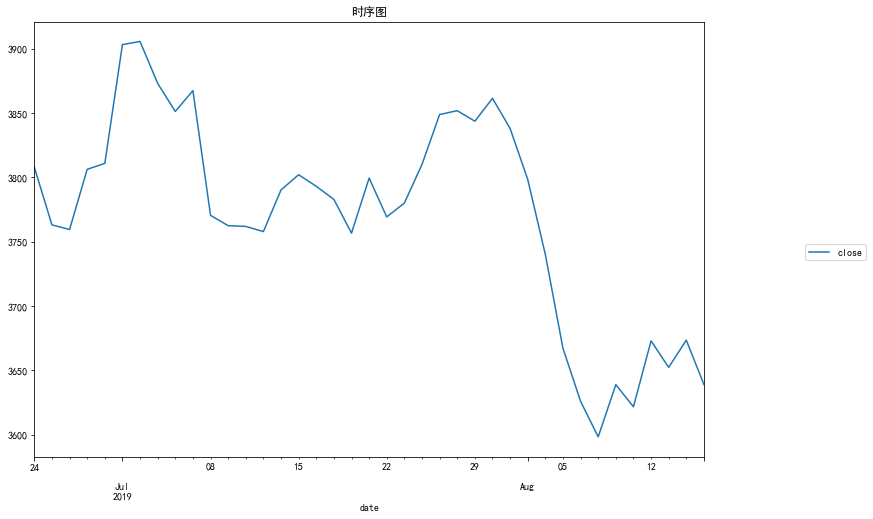

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


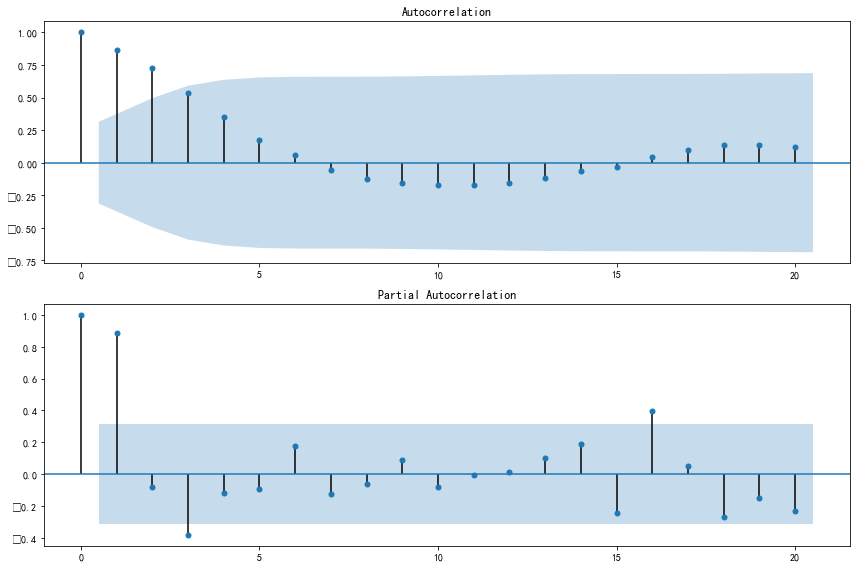

In [89]:
def draw_acf_pacf(data):
    """
    输入需要求解ACF\PACF的数据,
    data["xt"]
    """
    #模型的平稳性检验
    """时序图"""
    data.plot(figsize=(12,8))
    plt.legend(bbox_to_anchor=(1.25, 0.5))
    plt.title("时序图")
    fig = plt.figure(figsize=(12,8))      
        
    """ACF"""
    ax1 = fig.add_subplot(211)
    #这里用到了statsmodels.api as sm库中的函数
    fig = plot_acf(data, lags=20,ax=ax1)
    ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout();
    """PACF"""
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data, lags=20, ax=ax2)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout();
draw_acf_pacf(data["close"])   


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C625BBFF88>,
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


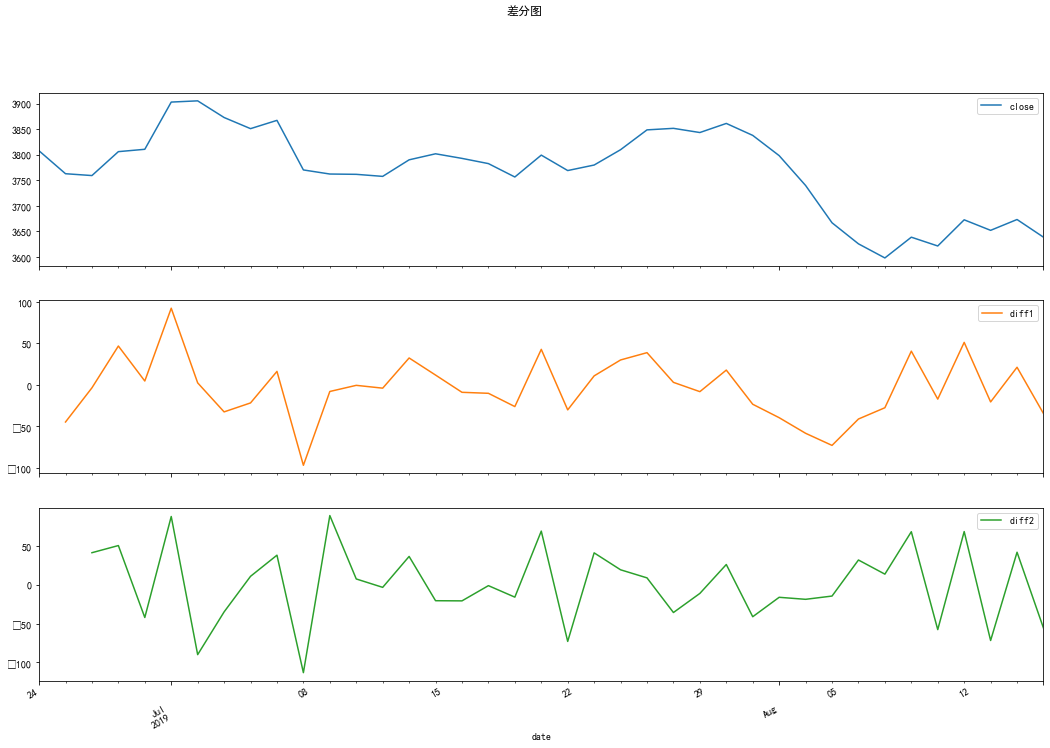

In [90]:
#一阶差分
data["diff1"] = data["close"].diff(1).dropna()
#二阶差分
data["diff2"] = data["diff1"].diff(1).dropna()
data1 = data.loc[:,["close","diff1","diff2"]]
data1.plot(subplots=True, figsize=(18, 12),title="差分图")

单位根检验:
，返回的结果中共有7个值，分别是adf、pvalue、usedlag、nobs          、critical values、icbest和resstore，这7个值的意义大家可以参考官方文档，
(-3.0898986832291833, 0.02730981877576863, 1, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, 265.5319842290461)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


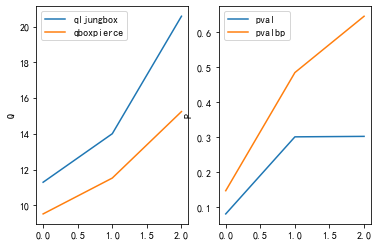

序列数据：qljungbox, pval, qboxpierce, pvalbp: [11.29809505 14.01067224 20.57537806] [0.07958894 0.30002728 0.3013742 ] [ 9.52810749 11.53237573 15.24683778] [0.14598308 0.48392677 0.64495436]


In [91]:
print(adf(data["diff1"].dropna()))
boxpierce_test(data['diff1'].dropna()) 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


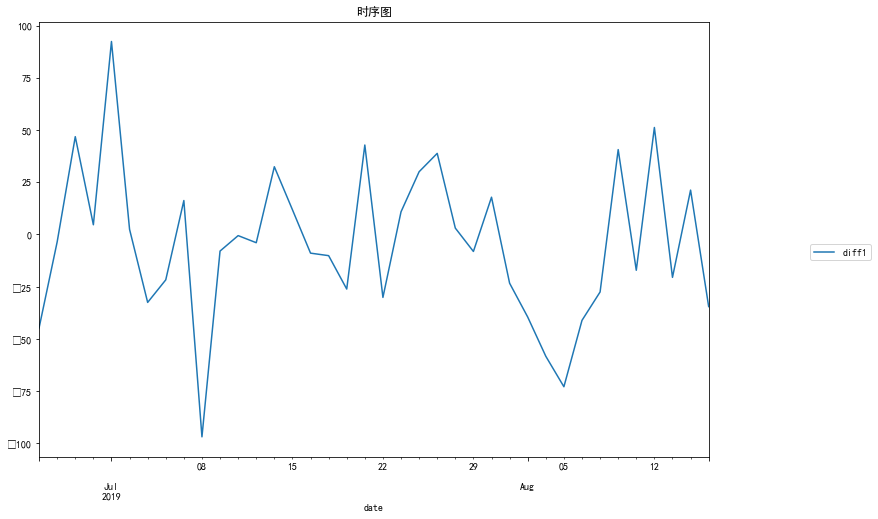

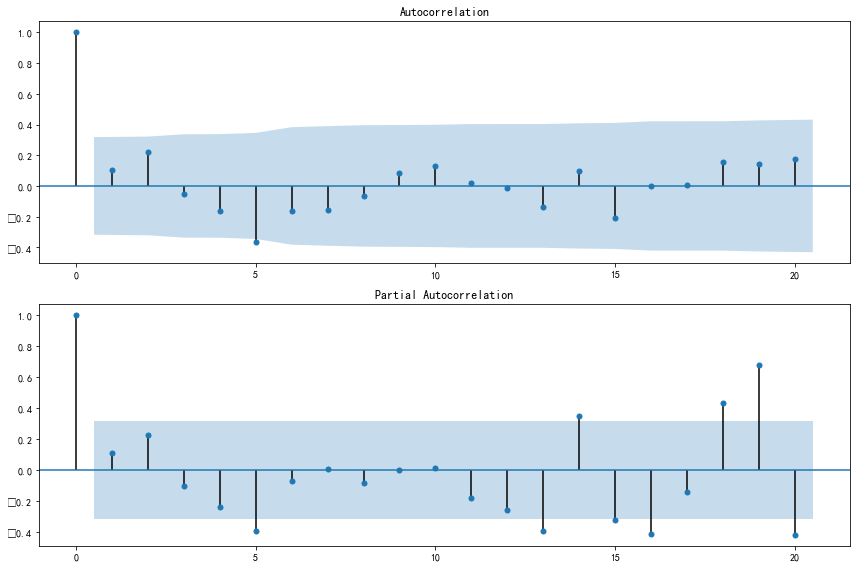

In [92]:
draw_acf_pacf(data["diff1"].dropna()) 

## 模型定阶

In [93]:
p = [0,0,5]
q = [0,5,0]
d = [1,1,1]
pdq = [p, d, q]
pdq = np.array(pdq).T
for i in pdq:
    print(i)

[0 1 0]
[0 1 5]
[5 1 0]


In [94]:
for param in pdq:
    model = ARIMA(data["close"],order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = model.fit()
    AIC = results.bic
    print('ARIMA{} - AIC:{}'.format(param,AIC))

ARIMA[0 1 0] - AIC:375.1385819838975
ARIMA[0 1 5] - AIC:333.3465994430072
ARIMA[5 1 0] - AIC:339.6861700410885


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\ProgramData\

In [113]:
trend_evaluate = sm.tsa.arma_order_select_ic(data["diff1"].dropna(),ic=['aic', 'bic'], trend='nc', max_ar=5,max_ma=5)
print('train AIC', trend_evaluate.aic_min_order)
print('train BIC', trend_evaluate.bic_min_order)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\

train AIC (5, 0)
train BIC (0, 0)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [114]:
model = ARIMA(data['close'],order=(5,1,0),enforce_stationarity=False,enforce_invertibility=False)
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                   39
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -159.354
Date:                Tue, 21 Jun 2022   AIC                            330.707
Time:                        14:14:04   BIC                            339.686
Sample:                    06-24-2019   HQIC                           333.728
                         - 08-15-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0139      0.172      0.081      0.936      -0.323       0.351
ar.L2          0.2230      0.165      1.355      0.175      -0.100       0.546
ar.L3          0.0179      0.201      0.089      0.929      -0.375       0.411
ar.L4         -0.0641      0.165     -0.389      0.698      -0.387       0.259
ar.L5         -0.3633      0.133     -2.738      0.006      -0.623      -0.103
sigma2       915.9068    281.244      3.257      0.001     364.679    1467.135
===================================================================================
Ljung-Box (Q):                       14.62   Jarque-Bera (JB):                 0.52
Prob(Q):                              1.00   Prob(JB):                         0.77
Heteroskedasticity (H):               1.34   Skew:                             0.22
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 模型预测

In [108]:
predict=results.predict(start='2019-7-10',end='2019-08-15')
predict

2019-07-10    3757.092703
2019-07-11    3770.715949
2019-07-12    3778.639942
2019-07-15    3808.329022
2019-07-16    3818.706164
2019-07-17    3798.992584
2019-07-18    3772.045162
2019-07-19    3737.814733
2019-07-22    3776.278383
2019-07-23    3774.625303
2019-07-24    3789.000802
2019-07-25    3821.316280
2019-07-26    3861.980445
2019-07-29    3865.919802
2019-07-30    3844.353337
2019-07-31    3845.074778
2019-08-01    3824.666272
2019-08-02    3786.934275
2019-08-05    3730.092630
2019-08-06    3657.109680
2019-08-07    3613.015469
2019-08-08    3594.678838
2019-08-09    3645.282716
2019-08-12    3653.832264
2019-08-13    3695.290584
2019-08-14    3673.443088
2019-08-15    3667.258613
Freq: B, dtype: float64

In [109]:
pred = results.get_prediction(start='2019-7-10',end='2019-08-15')
pred_ci = pred.conf_int()

In [110]:
pred_ci

,lower close,upper close
2019-07-10,3695.931496,3818.253909
2019-07-11,3709.657658,3831.774241
2019-07-12,3717.937378,3839.342507
2019-07-15,3747.855565,3868.802478
2019-07-16,3758.251443,3879.160885
2019-07-17,3738.573615,3859.411554
2019-07-18,3711.733566,3832.356757
2019-07-19,3677.567345,3798.062121
2019-07-22,3716.034757,3836.522008
2019-07-23,3714.394879,3834.855727


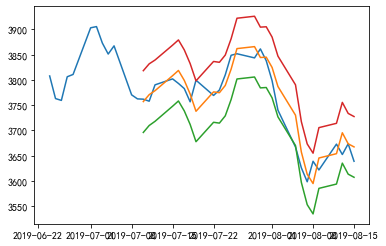

In [112]:
plt.plot(data['close'])
plt.plot(predict)
plt.plot(pred_ci['lower close'])
plt.plot(pred_ci['upper close'])
plt.show()

## 简单中心移动平均，提取趋势
### pandas 中的 rolling() 函数可以自动根据窗口大小对观测数据进行移动平均。

In [ ]:
window = 4
rolling = data.rolling(window=window)
rolling_mean = rolling.mean()

#一般rolling搭配着shift使用
lag1 = birth.shift(1)
lag3 = birth.shift(3)
lag3_mean = lag3.rolling(window=window).mean()
df = pd.concat([lag3_mean, lag1, lag3], axis=1)
df.columns = ['lag3_mean', 't-1', 't-3']
 
df.head()